In [1]:
import numpy as np
import time
import cv2
from boosting_classifier import Boosting_Classifier
from visualizer import Visualizer
from im_process import normalize
from utils import *

In [2]:
flag_subset = True
boosting_type = 'Ada' #'Real' or 'Ada'
training_epochs = 100 if not flag_subset else 20
act_cache_dir = 'tst_wc_activations.npy' if not flag_subset else 'tst_wc_activations_subset.npy'
chosen_wc_cache_dir = 'tst_chosen_wcs.pkl' if not flag_subset else 'tst_chosen_wcs_subset.pkl'

In [3]:
#data configurations
pos_data_dir = '../newface16'
neg_data_dir = '../nonface16'
image_w = 16
image_h = 16
data, labels = load_data(pos_data_dir, neg_data_dir, image_w, image_h, flag_subset)
data = integrate_images(normalize(data))

Load in 200 images, 100 faces, 100 non-faces


In [4]:
#number of bins for boosting
num_bins = 25

#number of cpus for parallel computing
num_cores = 8 if not flag_subset else 1 #always use 1 when debugging

In [5]:
#create Haar filters
filters = generate_Haar_filters(4, 4, 16, 16, image_w, image_h, flag_subset)

In [6]:
#create visualizer to draw histograms, roc curves and best weak classifier accuracies
drawer = Visualizer([10, 20, 50, 100], [1, 10, 20, 50, 100])

In [7]:
#create boost classifier with a pool of weak classifier
boost = Boosting_Classifier(filters, data, labels, training_epochs, num_bins, drawer, num_cores, boosting_type)

In [8]:
#calculate filter values for all training images
start = time.clock()
activations = boost.calculate_training_activations(act_cache_dir, act_cache_dir)
end = time.clock()
print('%f seconds for activation calculation' % (end - start))

Calcuate activations for 1000 weak classifiers, using 200 imags.
Weak Classifier No. 100 has finished applying
Weak Classifier No. 200 has finished applying
Weak Classifier No. 300 has finished applying
Weak Classifier No. 400 has finished applying
Weak Classifier No. 500 has finished applying
Weak Classifier No. 600 has finished applying
Weak Classifier No. 700 has finished applying
Weak Classifier No. 800 has finished applying
Weak Classifier No. 900 has finished applying
Weak Classifier No. 1000 has finished applying
Writing results to disk...
[Saved calculated activations to tst_wc_activations_subset.npy]
0.902755 seconds for activation calculation


# Code Testing

In [ ]:
#weight initialization
weights = [1/200.0]*200

## Single Weak Classifier - Adaboost WC Object

In [ ]:
wc1 = boost.weak_classifiers[0]

In [ ]:
print(wc1.polarity)
print(wc1.threshold)

In [ ]:
min_error = wc1.calc_error(weights, labels)

In [ ]:
min_error

In [ ]:
print(wc1.polarity)
print(wc1.threshold)

Filter visualization

In [ ]:
import matplotlib.patches as patches
def visualize_haar_filter(wc):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 16)

    for i in range(len(wc.plus_rects)):
        pos_xy = (wc.plus_rects[i][0], wc.plus_rects[i][1])
        pos_width = wc.plus_rects[i][2] -wc.plus_rects[i][0] +1
        pos_height = wc.plus_rects[i][3] - wc.plus_rects[i][1] +1
        
        rect_pos = patches.Rectangle(pos_xy,pos_width,pos_height, edgecolor = 'black', facecolor='black')
        ax.add_patch(rect_pos)
        
    for j in range(len(wc.minus_rects)):
        neg_xy = (wc.minus_rects[j][0], wc.minus_rects[j][1])
        neg_width = wc.minus_rects[j][2] -wc.minus_rects[j][0] +1
        neg_height = wc.minus_rects[j][3] - wc.minus_rects[j][1] +1

        rect_neg = patches.Rectangle(neg_xy,neg_width,neg_height,linewidth=1,edgecolor='black',facecolor='none')
        ax.add_patch(rect_neg)


    plt.show()

In [ ]:
print(boost.weak_classifiers[900].plus_rects)
print(boost.weak_classifiers[900].minus_rects)

In [ ]:
visualize_haar_filter(boost.weak_classifiers[900])

## Multiple weak classifiers as attributes of Boosting Classifier object

In [ ]:
print(boost.weak_classifiers[0].polarity)
print(boost.weak_classifiers[0].threshold)

print(boost.weak_classifiers[1].polarity)
print(boost.weak_classifiers[1].threshold)

In [ ]:
classifier_errors = boost.weak_classifier_errors(weights)

In [ ]:
print(boost.weak_classifiers[0].polarity)
print(boost.weak_classifiers[0].threshold)

print(boost.weak_classifiers[1].polarity)
print(boost.weak_classifiers[1].threshold)

In [ ]:
print(classifier_errors[0])
print(classifier_errors[1])

In [9]:
chosenWeakClassifiers = boost.train(chosen_wc_cache_dir)

100%|██████████| 20/20 [02:11<00:00,  6.62s/it]


In [ ]:
boost.chosen_wcs

In [ ]:
boost.visualizer.weak_classifier_accuracies

In [ ]:
boost.sc_function(boost.data[0])

In [ ]:
boost.set_strong_classifier_scores()

KeyError: 49

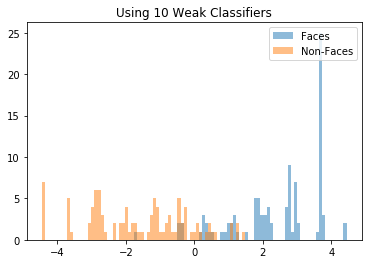

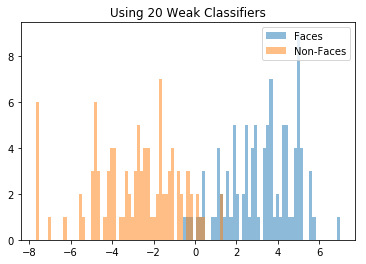

In [10]:
boost.visualize()

In [15]:
boost.visualizer.top_wc_intervals = [1,10,20]

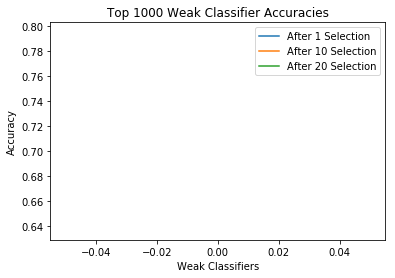

In [20]:
boost.visualizer.draw_wc_accuracies()

In [17]:
boost.visualizer.weak_classifier_accuracies

{0: 0.795,
 1: 0.7478648122406956,
 2: 0.7287529337444404,
 3: 0.7088915961697809,
 4: 0.6894411446248079,
 5: 0.6976152305127453,
 6: 0.6791952736794469,
 7: 0.6840816257076441,
 8: 0.6741113739065544,
 9: 0.6639229316580181,
 10: 0.6658091818192324,
 11: 0.6670933542285645,
 12: 0.6718447969793686,
 13: 0.6585895949491082,
 14: 0.6535423018370782,
 15: 0.6544211076567163,
 16: 0.6566754481238728,
 17: 0.6558327024219041,
 18: 0.6444294956058758,
 19: 0.6370042969437848}

In [ ]:
#original_img = cv2.imread('../Testing_Images/Face_1.jpg', cv2.IMREAD_GRAYSCALE)
#result_img = boost.face_detection(original_img)
#cv2.imwrite('Result_img_%s.png' % boosting_type, result_img)

## Toy example

In [ ]:
fltr_indices = [0, 100, 300, 500, 800]
toy_filters = [filters[i] for i in fltr_indices]#five filters
toy_data = np.vstack((np.array(data[0:5, :, :]), np.array(data[190:195, :, :]))) #10 images
l1 = list(labels[0:5])
l2 = list(labels[190:195])
toy_labels =  np.array(l1+ l2)  #10 labels

In [ ]:
toy_boost = Boosting_Classifier(toy_filters, toy_data, toy_labels, 4, num_bins, drawer, 1, "Ada")

In [ ]:
initial_toy_weights = [.1]*10
initial_toy_weights

In [ ]:
toy_boost.weak_classifiers[0]

In [ ]:
print(toy_boost.weak_classifiers[0].activations)

Setting up activations

In [ ]:
activations = toy_boost.calculate_training_activations("toy_act_dir.npy", "toy_act_dir.npy")

In [ ]:
print(activations.shape)
print(activations)

In [ ]:
toy_boost.weak_classifiers[0].activations

In [ ]:
print("Classifier 1:")
print("min error: ", toy_boost.weak_classifiers[0].calc_error(initial_toy_weights, toy_labels))
print("th: ", toy_boost.weak_classifiers[0].threshold)
print("pol: ", toy_boost.weak_classifiers[0].polarity)

print("Classifier 2:")
print("min error: ", toy_boost.weak_classifiers[1].calc_error(initial_toy_weights, toy_labels))
print("th: ", toy_boost.weak_classifiers[1].threshold)
print("pol: ", toy_boost.weak_classifiers[1].polarity)

print("Classifier 3:")
print("min error: ", toy_boost.weak_classifiers[2].calc_error(initial_toy_weights, toy_labels))
print("th: ", toy_boost.weak_classifiers[2].threshold)
print("pol: ", toy_boost.weak_classifiers[2].polarity)

print("Classifier 4:")
print("min error: ", toy_boost.weak_classifiers[3].calc_error(initial_toy_weights, toy_labels))
print("th: ", toy_boost.weak_classifiers[3].threshold)
print("pol: ", toy_boost.weak_classifiers[3].polarity)

print("Classifier 5:")
print("min error: ", toy_boost.weak_classifiers[4].calc_error(initial_toy_weights, toy_labels))
print("th: ", toy_boost.weak_classifiers[4].threshold)
print("pol: ", toy_boost.weak_classifiers[4].polarity)

In [ ]:
print(toy_boost.labels == 1) #correct labels
for classifier in toy_boost.weak_classifiers:
    print(classifier.activations*classifier.polarity > classifier.threshold*classifier.polarity)

In [ ]:
initial_toy_weights

calculate all weak classifier errors using the weighted data

In [ ]:
min_error = [classifier.calc_error(initial_toy_weights, toy_boost.labels)for classifer in toy_boost.weak_classifiers]
print("min error: ", min_error)    

select the best weak classifier

In [ ]:
import copy
bestWCIndex = min_error.index(min(min_error))
bestWClassifier = copy.deepcopy(toy_boost.weak_classifiers[bestWCIndex])
print(bestWClassifier)
print(bestWClassifier.polarity)
print(bestWClassifier.threshold)

In [ ]:
selectedWC = []

calculate alpha value

In [ ]:
alph = toy_boost.calculate_alpha(min(min_error))
selectedWC.append([alph, bestWClassifier])
print("alpha: ", alph)

In [ ]:
#check, the error is .3, plug into the formula for alpha
.5*(np.log((1-.3)/.3))

In [ ]:
#for bestWC, which data points did it incorrectly classify?
print(toy_boost.labels == 1) #correct labels
print(bestWClassifier.activations*bestWClassifier.polarity > bestWClassifier.threshold*bestWClassifier.polarity)

In [ ]:
initial_toy_weights

In [ ]:
weights = toy_boost.update_weights(bestWClassifier, initial_toy_weights, alph)

In [ ]:
weights

In [ ]:
min_error_2 = [classifier.calc_error(weights, toy_boost.labels)for classifer in toy_boost.weak_classifiers]
print("min error: ", min_error_2 )
    
bestWCIndex = min_error_2.index(min(min_error_2))
bestWClassifier = copy.deepcopy(toy_boost.weak_classifiers[bestWCIndex])
print(bestWClassifier)
print(bestWClassifier.polarity)
print(bestWClassifier.threshold)

In [ ]:
toy_boost.train()

In [ ]:
[toy_boost.sc_function(img) for img in toy_boost.data]

In [ ]:
toy_boost.set_strong_classifier_scores

In [ ]:
toy_boost.visualizer.strong_classifier_scores

Perform hard mining after all the training epochs are over, using the final strong classifier to get the wrong patches, and then restart the training process with the added wrong patches?